In [25]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS

In [26]:
df = pd.read_csv('Dataset/df_limpio.csv')

Se cuentan el numeero de filas y columnas para saber el volumen de datos que estamos manejando.

In [27]:
filas, columnas = df.shape
print(f'Existen {filas} filas y {columnas} columnas')


Existen 45451 filas y 20 columnas


Describimos todo el dataset para darnos un vistazo general de los datos del mismo.

In [28]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,return
count,4.545100e+04,45451.000000,45451.000000,4.545100e+04,45205.000000,45451.000000,45451.000000,4.545100e+04
mean,4.231294e+06,107984.599745,2.926887,1.121930e+07,94.181905,5.624085,109.989703,6.589542e+02
std,1.742942e+07,112111.336735,6.006458,6.433984e+07,38.329504,1.915424,491.352336,7.463165e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,26367.500000,0.389095,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00
50%,0.000000e+00,59871.000000,1.131386,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00
75%,0.000000e+00,156327.500000,3.694370,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07


Observamos el valor maximo y minimo de una columna tan importante como les Budget y nos damos cuenta que la pelicula con mayor presupuesto es de $380,000,000

In [29]:
valor_maximo = df['budget'].max()
valor_minimo = df['budget'].min()


print(f'El valor maximo es {valor_maximo} y el valor minimo es {valor_minimo}')

El valor maximo es 380000000 y el valor minimo es 0


Hacemos lo mismo con la columna de ganacia para darnos cuenta que la ganancia maxima  de de una pelicula es de $2,787,965,087 y que el valor minimo de ganancia es de 0 esto probablemente a la falta de este dato

In [30]:
valor_maximo = df['revenue'].max()
valor_minimo = df['revenue'].min()

print(f'El valor maximo es {valor_maximo} y el valor minimo es {valor_minimo}')

El valor maximo es 2787965087.0 y el valor minimo es 0.0


En la siguiente grafica podemos observar las fechas en las que mas peliculas fueron estrenadas y donde podemos observar que en el periodo de 2002 a 2010 es donde se estrenaron mas peliculas.

<Axes: xlabel='release_date'>

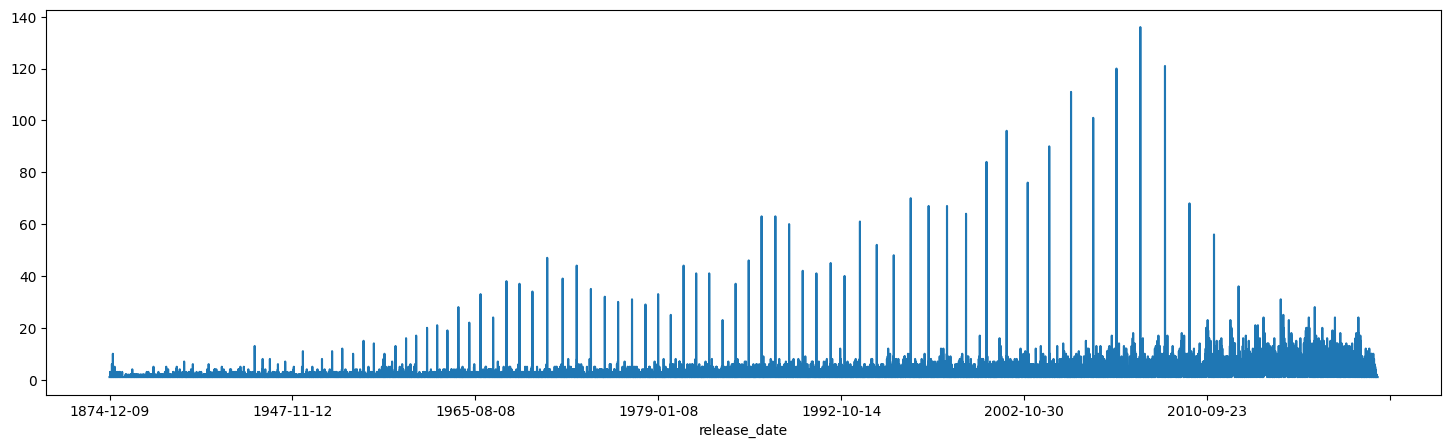

In [31]:
anios = df.groupby('release_date')['title'].count()
plt.figure(figsize=(18,5))
anios.plot()


En la siguiente grafica podemos observar la distribución de los generos en las peliculas, nos damos cuenta que el genero predominante dentro de este dataset es Drama, mientras que el genero con menor numero de peliculas es el genero Western

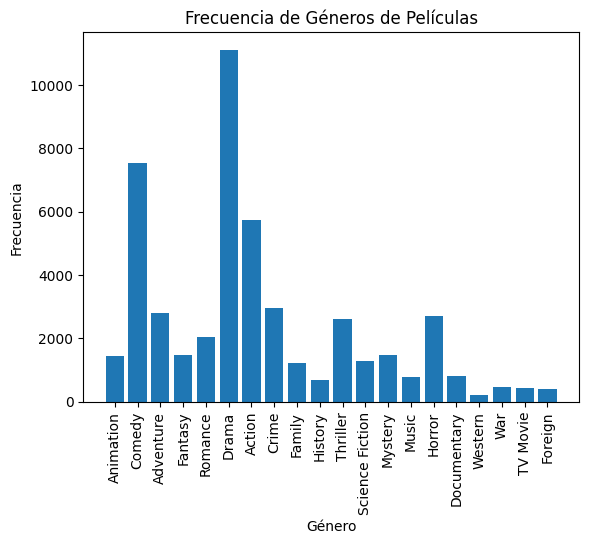

In [32]:
df['genres'] = df['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])
count_dict = {}
for genres_list in df['genres']:
    for genre in genres_list:
        if genre in count_dict:
            count_dict[genre] += 1
        else:
            count_dict[genre] = 1

genre_names = list(count_dict.keys())
genre_counts = list(count_dict.values())

plt.bar(genre_names, genre_counts)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Géneros de Películas')
plt.xticks(rotation=90)
plt.show()

En la sieugiente figura buscamos las correlaciones y las mostramos con un heatmap.

In [33]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extraer únicamente el año de la columna "release_date"
df['release_year'] = df['release_date'].dt.year

<Axes: >

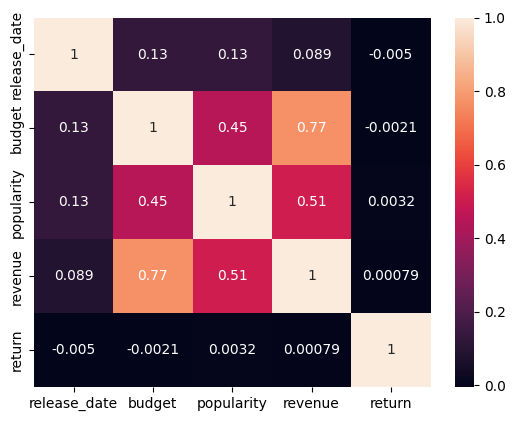

In [34]:
df_correlaciones = df[['release_date', 'budget','popularity', 'revenue', 'return']].dropna().corr()
sb.heatmap(df_correlaciones, annot=True)

Posteriormente buscamos outlayers en distintas columnas donde nos interesa conocer ese dato.

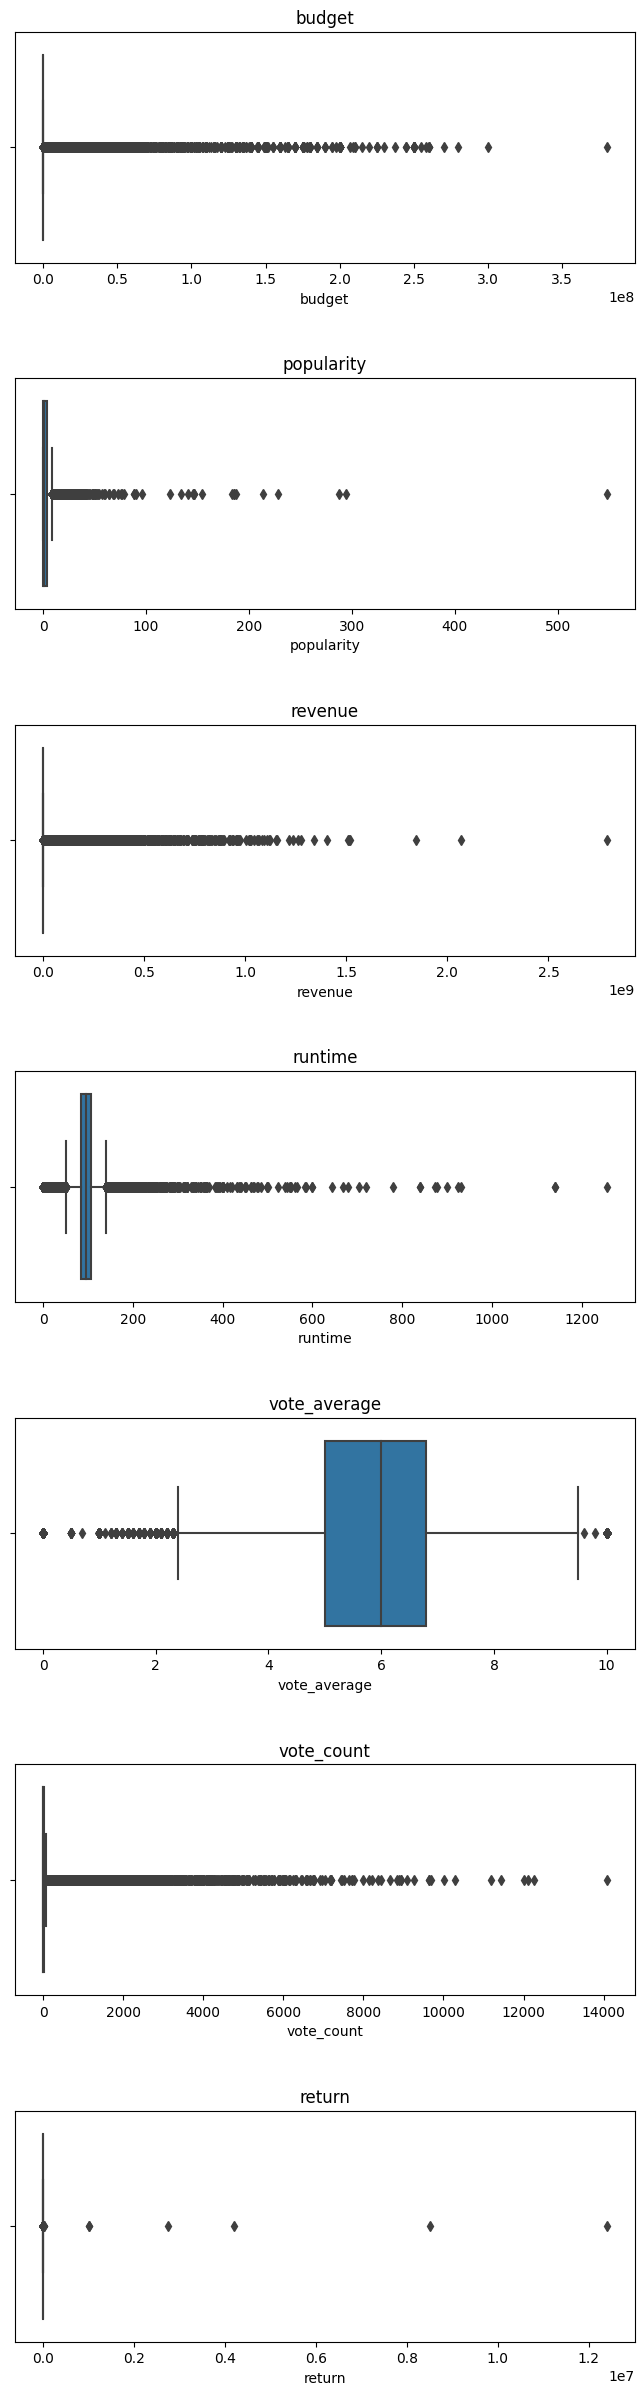

In [35]:
cols_num = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize = (8,30))
fig.subplots_adjust(hspace= 0.5)
for i, col in enumerate(cols_num):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    sb.boxplot(x = col, data = df, ax = ax[i])
    ax[i].set_title(col)

Posteriormente creamos una nube de palabras en base a la columna title para darnos cuenta que las palbras que mas se repiten en los titulos es Love, Girl y Man

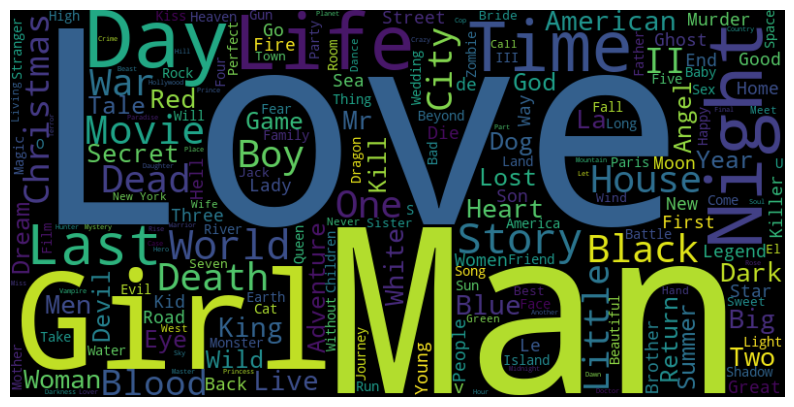

In [36]:
texto = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400).generate(texto)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Por ultimo hacemos lo mismo con la columna de Overview y nos damos cuenta que las palabras que mas se repiten son find, life y one

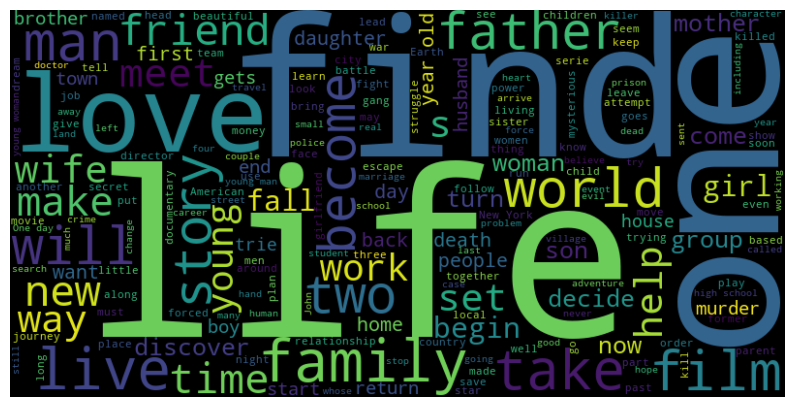

In [37]:
texto = ' '.join(df['overview'][df['overview'].notnull()])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(texto)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
